In [ ]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [ ]:
# how colab open files:
# https://saturncloud.io/blog/how-to-use-google-colab-to-work-with-local-files/
# https://stackoverflow.com/questions/48376580/how-to-read-data-in-google-colab-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
google_drive_path_header = '/content/drive/MyDrive/analytics_programming/'

Mounted at /content/drive


 # Bitly Data from 1.USA.gov
 In 2011, the URL shortening service Bitly partnered with the US government website
 USA.gov to provide a feed of anonymous data gathered from users who shorten links
 ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available
 as downloadable text files. This service is shut down at the time of this writing (2022),
 but we preserved one of the data files for the book’s examples.
 In the case of the hourly snapshots, each line in each file contains a common form of
 web data known as JSON, which stands for JavaScript Object Notation. For example,
 if we read just the first line of a file, we may see something like this:

In [ ]:
path = google_drive_path_header+"datasets/bitly_usagov/example.txt"

In [ ]:
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [ ]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [ ]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

Python has both built-in and third-party libraries for converting a JSON string into a
 Python dictionary. Here we’ll use the json module and its loads function invoked on
 each line in the sample file we downloaded:

# Counting Time Zones in Pure Python
 Suppose we were interested in finding the time zones that occur most often in the
 dataset (the tz field). There are many ways we could do this. First, let’s extract a list of
 time zones again using a list comprehension:

In [ ]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

Oops! Turns out that not all of the records have a time zone field. We can handle this
 by adding the check if "tz" in rec at the end of the list comprehension

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

 Just looking at the first 10 time zones, we see that some of them are unknown (empty
 string). You can filter these out also, but I’ll leave them in for now. Next, to produce
 counts by time zone, I’ll show two approaches: a harder way (using just the Python
 standard library) and a simpler way (using pandas). One way to do the counting is to
 use a dictionary to store counts while we iterate through the time zones:

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

 Using more advanced tools in the Python standard library, you can write the same
 thing more briefly:

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

 I put this logic in a function just to make it more reusable. To use it on the time
 zones, just pass the time_zones list:

In [ ]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

 If we wanted the top 10 time zones and their counts, we can make a list of tuples by
 (count, timezone) and sort it:

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

 We have then:

In [ ]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

 If you search the Python standard library, you may find the collections.Counter
 class, which makes this task even simpler:

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#  Counting Time Zones with pandas
 You can create a DataFrame from the original set of records by passing the list of
 records to pandas.DataFrame:

In [ ]:
frame = pd.DataFrame(records)

We can look at some basic information about this new DataFrame, such as column
 names, inferred column types, or number of missing values, using frame.info():

In [ ]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


The output shown for the frame is the summary view, shown for large DataFrame
 objects. We can then use the value_counts method for the Series:

In [ ]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


We can visualize this data using matplotlib. We can make the plots a bit nicer by
 filling in a substitute value for unknown or missing time zone data in the records. We
 replace the missing values with the fillna method and use Boolean array indexing
 for the empty strings:

In [ ]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [ ]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

 At this point, we can use the seaborn package to make a horizontal bar plot (see
 Figure 13-1 for the resulting visualization):

<Axes: ylabel='tz'>

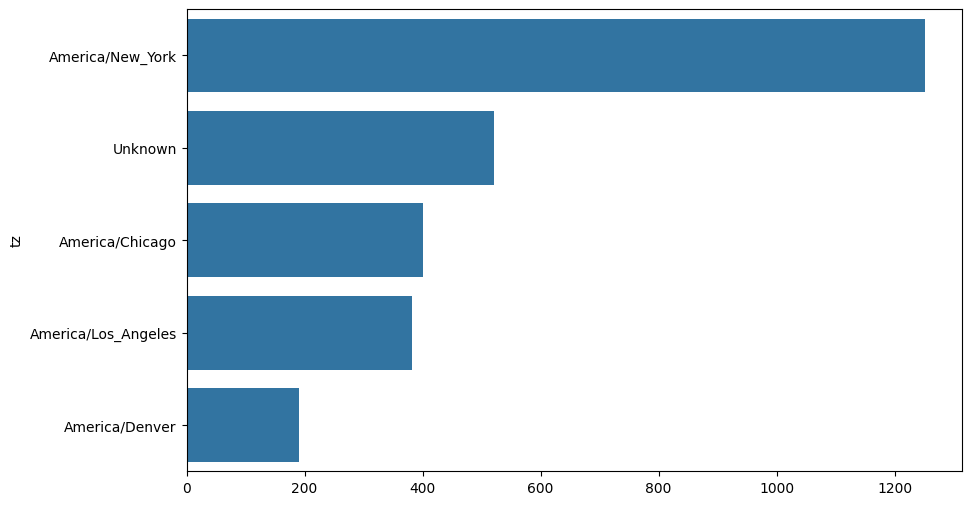

In [ ]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

 The a field contains information about the browser, device, or application used to
 perform the URL shortening:

In [ ]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

 Parsing all of the interesting information in these “agent” strings may seem like
 a daunting task. One possible strategy is to split off the first token in the string
 (corresponding roughly to the browser capability) and make another summary of the
 user behavior:

In [ ]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


 Now, suppose you wanted to decompose the top time zones into Windows and
 non-Windows users. As a simplification, let’s say that a user is on Windows if the
 string "Windows" is in the agent string. Since some of the agents are missing, we’ll
 exclude these from the data:

In [ ]:
cframe = frame[frame["a"].notna()].copy()

We want to then compute a value for whether or not each row is Windows:

In [ ]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


Then, you can group the data by its time zone column and this new list of operating
 systems:

In [ ]:
by_tz_os = cframe.groupby(["tz", "os"])

 The group counts, analogous to the value_counts function, can be computed with
 size. This result is then reshaped into a table with unstack:

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


 Finally, let’s select the top overall time zones. To do so, I construct an indirect index
 array from the row counts in agg_counts. After computing the row counts with
 agg_counts.sum("columns"), I can call argsort() to obtain an index array that can
 be used to sort in ascending order:

In [ ]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

I use take to select the rows in that order, then slice off the last 10 rows (largest
 values):

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas has a convenience method called nlargest that does the same thing:

In [ ]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [ ]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

 Then, this can be plotted in a grouped bar plot comparing the number of Windows
 and non-Windows users, using seaborn’s barplot function (see Figure 13-2). I first
 call count_subset.stack() and reset the index to rearrange the data for better
 compatibility with seaborn:

<Axes: xlabel='total', ylabel='tz'>

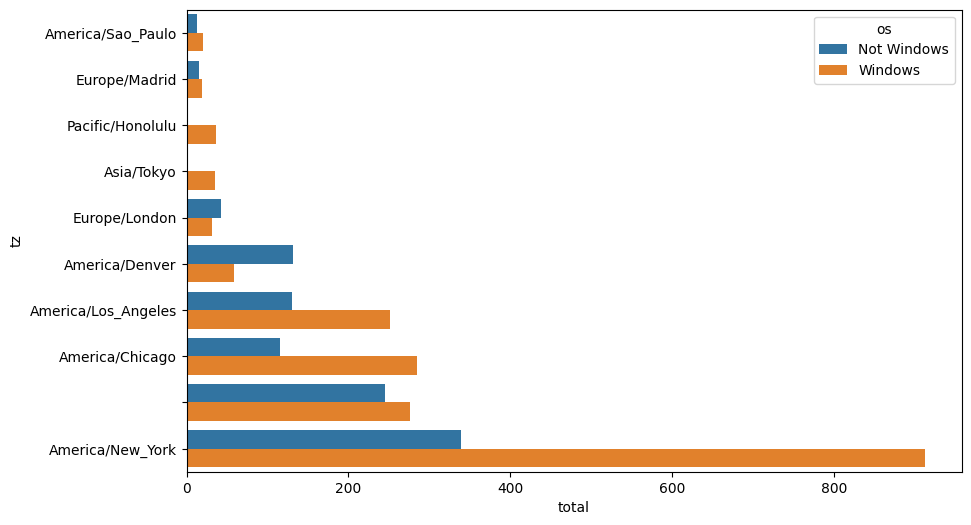

In [ ]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

 It is a bit difficult to see the relative percentage of Windows users in the smaller
 groups, so let’s normalize the group percentages to sum to 1:

In [ ]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

<ipython-input-48-26a7a3900395>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [ ]:
plt.figure()

Then plot this in

<Axes: xlabel='normed_total', ylabel='tz'>

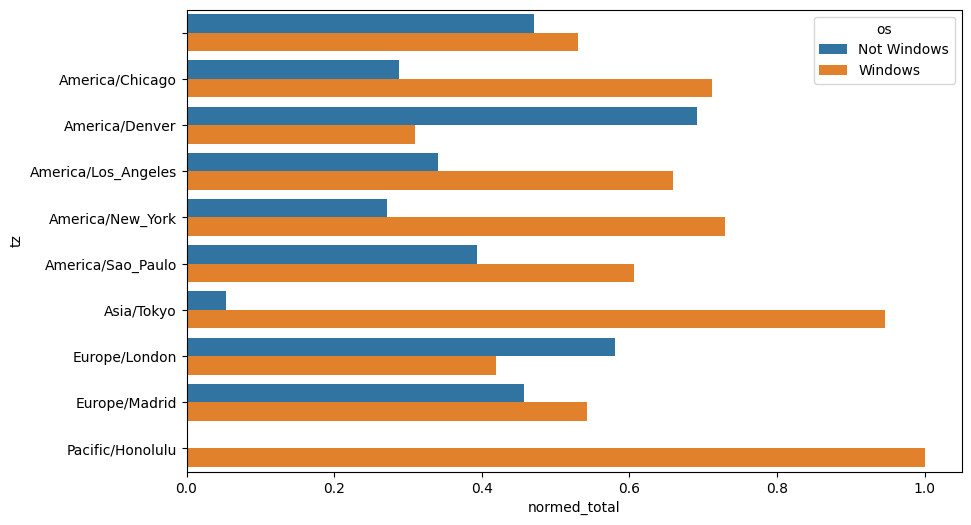

In [ ]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

We could have computed the normalized sum more efficiently by using the trans
 form method with groupby:

In [ ]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

# MovieLens 1M Dataset
 GroupLens Research provides a number of collections of movie ratings data collected
 from users of MovieLens in the late 1990s and early 2000s. The data provides movie
 ratings, movie metadata (genres and year), and demographic data about the users
 (age, zip code, gender identification, and occupation). Such data is often of interest in
 the development of recommendation systems based on machine learning algorithms.
 While we do not explore machine learning techniques in detail in this book, I will
 show you how to slice and dice datasets like these into the exact form you need.
 The MovieLens 1M dataset contains one million ratings collected from six thousand
 users on four thousand movies. It’s spread across three tables: ratings, user informa
tion, and movie information. We can load each table into a pandas DataFrame object
 using pandas.read_table. Run the following code in a Jupyter cell:

In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(google_drive_path_header+"datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(google_drive_path_header+"datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(google_drive_path_header+"datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

 You can verify that everything succeeded by looking at each DataFrame

In [ ]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


 Note that ages and occupations are coded as integers indicating groups described
 in the dataset’s README file. Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings for a
 particular movie by gender identity and age. As you will see, this is more convenient
 to do with all of the data merged together into a single table. Using pandas’s merge
 function, we first merge ratings with users and then merge that result with the
 movies data. pandas infers which columns to use as the merge (or join) keys based on
 overlapping names:

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

,0
user_id,1
movie_id,1193
rating,5
timestamp,978300760
gender,F
age,1
occupation,10
zip,48067
title,One Flew Over the Cuckoo's Nest (1975)
genres,Drama


To get mean movie ratings for each film grouped by gender, we can use the
 pivot_table method:

In [ ]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


 This produced another DataFrame containing mean ratings with movie titles as row
 labels (the “index”) and gender as column labels. I first filter down to movies that
 received at least 250 ratings (an arbitrary number); to do this, I group the data by
 title, and use size() to get a Series of group sizes for each title:

In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

 The index of titles receiving at least 250 ratings can then be used to select rows from
 mean_ratings using .loc:

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [ ]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

 To see the top films among female viewers, we can sort by the F column in descend
ing order:

In [ ]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


 # Measuring Rating Disagreement
 Suppose you wanted to find the movies that are most divisive between male and
 female viewers. One way is to add a column to mean_ratings containing the differ
ence in means, then sort by that:

In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

 Sorting by "diff" yields the movies with the greatest rating difference so that we can
 see which ones were preferred by women:

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


 Reversing the order of the rows and again slicing off the top 10 rows, we get the
 movies preferred by men that women didn’t rate as highly:

In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


 Suppose instead you wanted the movies that elicited the most disagreement among
 viewers, independent of gender identification. Disagreement can be measured by the
 variance or standard deviation of the ratings. To get this, we first compute the rating
 standard deviation by title and then filter down to the active titles:

In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


 Then, we sort in descending order and select the first 10 rows, which are roughly the
 10 most divisively rated movies:

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


 You may have noticed that movie genres are given as a pipe-separated (|) string, since
 a single movie can belong to multiple genres. To help us group the ratings data by
 genre, we can use the explode method on DataFrame. Let’s take a look at how this
 works. First, we can split the genres string into a list of genres using the str.split
 method on the Series:

In [ ]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


Now, calling movies.explode("genre") generates a new DataFrame with one row for
 each “inner” element in each list of movie genres. For example, if a movie is classified
 as both a comedy and a romance, then there will be two rows in the result, one with
 just "Comedy" and the other with just "Romance":

In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


 Now, we can merge all three tables together and group by genre:

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

13.3 US Baby Names 1880–2010
 The United States Social Security Administration (SSA) has made available data on
 the frequency of baby names from 1880 through the present. Hadley Wickham, an
 author of several popular R packages, has this dataset in illustrating data manipula
tion in R.
 We need to do some data wrangling to load this dataset, but once we do that we will
 have a DataFrame that looks like this:

In [ ]:
path = google_drive_path_header+'datasets/babynames/yob1880.txt'
print(path)
!head -n 10 /content/drive/MyDrive/analytics_programming/datasets/babynames/yob1880.txt

/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1880.txt
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [ ]:
names1880 = pd.read_csv(google_drive_path_header+"datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files only contain names with at least five occurrences in each year, so for
 simplicity’s sake we can use the sum of the births column by sex as the total number
 of births in that year:

In [ ]:
names1880.groupby("sex")["births"].sum()

,births
sex,
F,90993
M,110493


 Since the dataset is split into files by year, one of the first things to do is to assemble
 all of the data into a single DataFrame and further add a year field. You can do this
 using pandas.concat.

In [ ]:
pieces = []
for year in range(1880, 2011):
    path = google_drive_path_header + f"datasets/babynames/yob{year}.txt"
    print(path)
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1880.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1881.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1882.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1883.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1884.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1885.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1886.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1887.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1888.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1889.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1890.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1891.txt
/content/drive/MyDrive/analytics_programming/datasets/babynames/yob1892.txt
/content/dri

There are a couple things to note here. First, remember that concat combines the
 DataFrame objects by row by default. Second, you have to pass ignore_index=True
 because we’re not interested in preserving the original row numbers returned from
 pandas.read_csv. So we now have a single DataFrame containing all of the names
 data across all years:

In [ ]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


With this data in hand, we can already start aggregating the data at the year and sex
 level using groupby or pivot_table

<ipython-input-78-f42f21fa2b9e>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year",


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

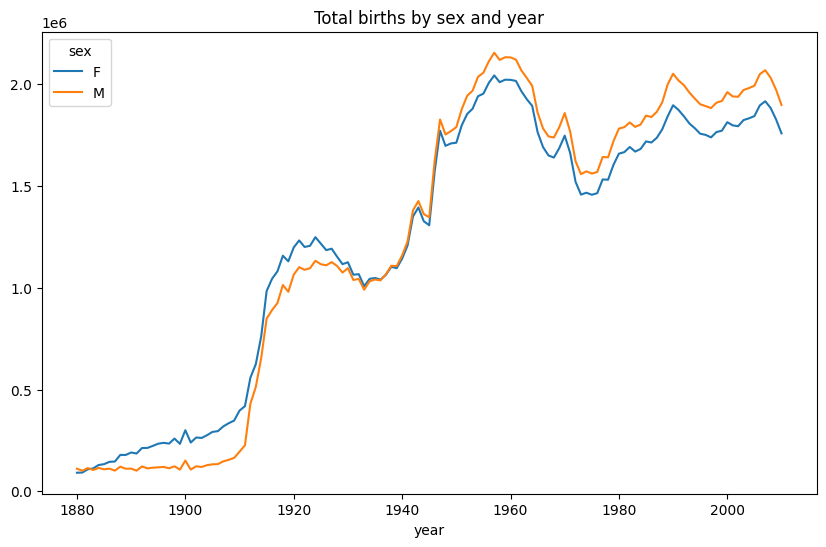

In [ ]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

 Next, let’s insert a column prop with the fraction of babies given each name relative
 to the total number of births. A prop value of 0.02 would indicate that 2 out of every
 100 babies were given a particular name. Thus, we group the data by year and sex,
 then add the new column to each group

In [ ]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

<ipython-input-81-e3f1dc45d46a>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)


 The resulting complete dataset now has the following columns:

In [ ]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


 When performing a group operation like this, it’s often valuable to do a sanity check,
 like verifying that the prop column sums to 1 within all the groups:

In [ ]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

 Now that this is done, I’m going to extract a subset of the data to facilitate further
 analysis: the top 1,000 names for each sex/year combination. This is yet another
 group operation:

 Now that this is done, I’m going to extract a subset of the data to facilitate further
 analysis: the top 1,000 names for each sex/year combination. This is yet another
 group operation:

In [ ]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

<ipython-input-84-bec01ae10272>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

We can drop the group index since we don’t need it for our analysis

In [ ]:
top1000 = top1000.reset_index(drop=True)

In [ ]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


The resulting dataset is now quite a bit smaller

 We’ll use this top one thousand dataset in the following investigations into the data

 # Analyzing Naming Trends
 With the full dataset and the top one thousand dataset in hand, we can start analyzing
 various naming trends of interest. First, we can split the top one thousand names into
 the boy and girl portions:

In [ ]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

 Simple time series, like the number of Johns or Marys for each year, can be plotted
 but require some manipulation to be more useful. Let’s form a pivot table of the total
 number of births by year and name

In [ ]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

<ipython-input-89-ece287ce9797>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births", index="year",


 Now, this can be plotted for a handful of names with DataFrame’s plot method

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

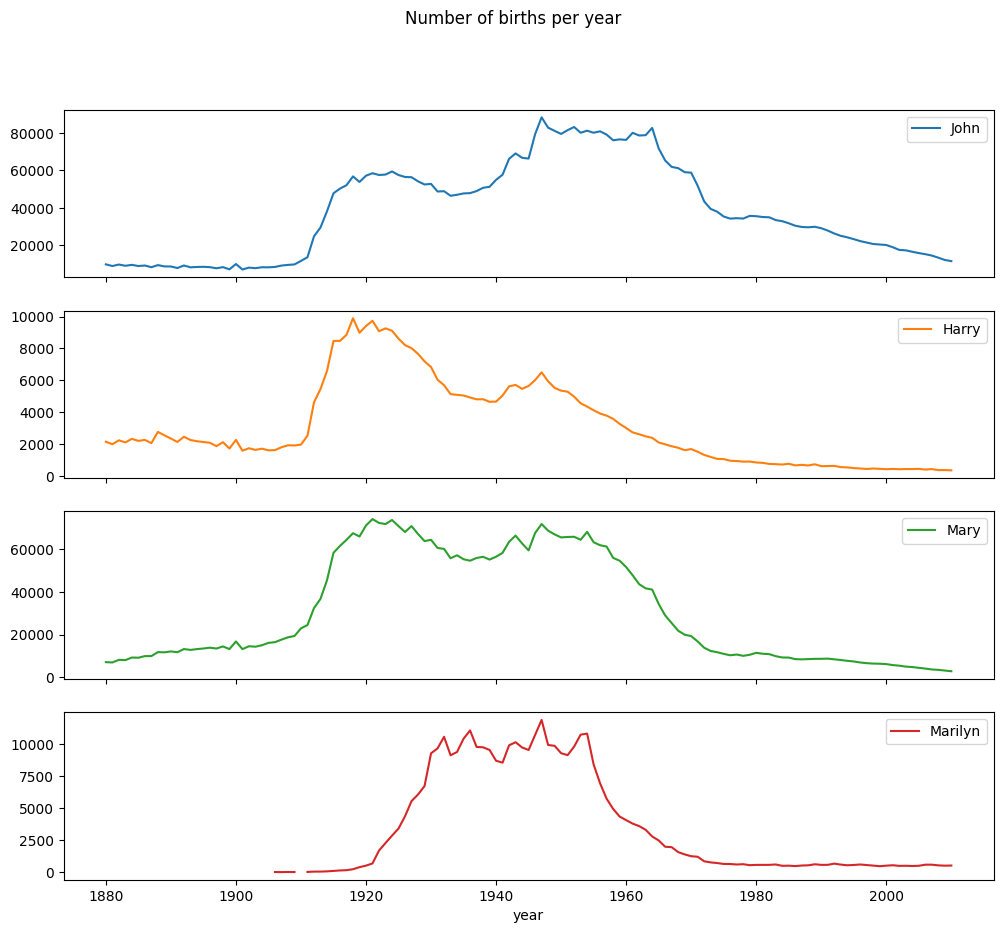

In [ ]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

 On looking at this, you might conclude that these names have grown out of favor
 with the American population. But the story is actually more complicated than that,
 as will be explored in the next section.

In [ ]:
plt.figure()

 # Measuring the increase in naming diversity
 One explanation for the decrease in plots is that fewer parents are choosing common
 names for their children. This hypothesis can be explored and confirmed in the data.
 One measure is the proportion of births represented by the top 1,000 most popular
 names, which I aggregate and plot by year and sex (Figure 13-6 shows the resulting
 plot)

<ipython-input-91-2d16b319016e>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop", index="year",


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

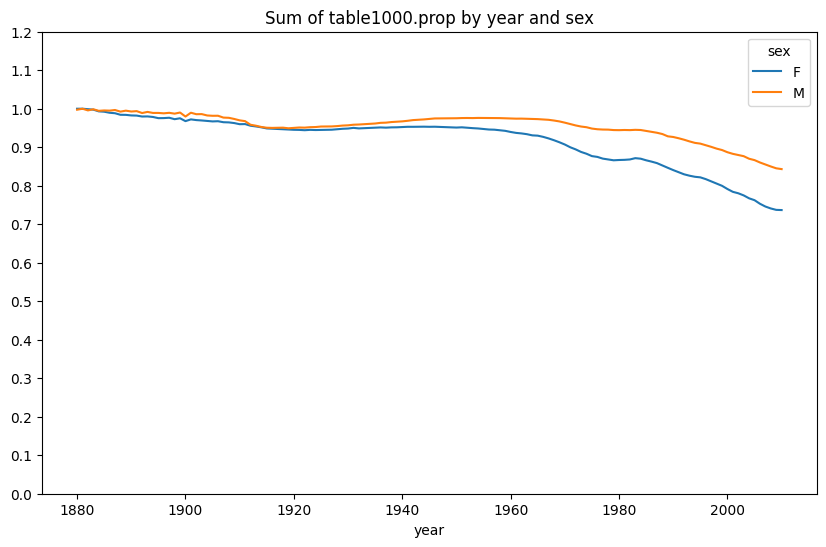

In [ ]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

 You can see that, indeed, there appears to be increasing name diversity (decreasing
 total proportion in the top one thousand). Another interesting metric is the number
 of distinct names, taken in order of popularity from highest to lowest, in the top 50%
 of births. This number is trickier to compute. Let’s consider just the boy names from
 2010:

In [ ]:
df = boys[boys["year"] == 2010]
df

NameError: name 'boys' is not defined

 After sorting prop in descending order, we want to know how many of the most
 popular names it takes to reach 50%. You could write a for loop to do this, but a
 vectorized NumPy way is more computationally efficient. Taking the cumulative sum,
 cumsum, of prop and then calling the method searchsorted returns the position in
 the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order

In [ ]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

 Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By
 contrast, in 1900 this number was much smaller:

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

 You can now apply this operation to each year/sex combination, groupby those fields,
 and apply a function returning the count for each group:

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

<ipython-input-93-94252a958cf6>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


 This resulting DataFrame diversity now has two time series, one for each sex,
 indexed by year. This can be inspected and plotted as before

In [ ]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [ ]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

 As you can see, girl names have always been more diverse than boy names, and they
 have only become more so over time. Further analysis of what exactly is driving the
 diversity, like the increase of alternative spellings, is left to the reader

 # The “last letter” revolution
 In 2007, baby name researcher Laura Wattenberg pointed out that the distribution of
 boy names by final letter has changed significantly over the last 100 years. To see this,
 we first aggregate all of the births in the full dataset by year, sex, and final letter:

In [ ]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

 Then we select three representative years spanning the history and print the first few
 rows:

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

 Next, normalize the table by total births to compute a new table containing the
 proportion of total births for each sex ending in each letter

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

With the letter proportions now in hand, we can make bar plots for each sex, broken
 down by year

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

 As you can see, boy names ending in n have experienced significant growth since
 the 1960s. Going back to the full table created before, I again normalize by year and
 sex and select a subset of letters for the boy names, finally transposing to make each
 column a time series:

In [ ]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

In [ ]:
plt.close("all")

In [ ]:
fig = plt.figure()

With this DataFrame of time series in hand, I can make a plot of the trends over time
 again with its plot method

In [ ]:
dny_ts.plot()

 Boy names that became girl names (and vice versa)
 Another fun trend is looking at names that were more popular with one gender
 earlier in the sample but have become preferred as a name for the other gender
 over time. One example is the name Lesley or Leslie. Going back to the top1000
 DataFrame, I compute a list of names occurring in the dataset starting with “Lesl”:

In [ ]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

In [ ]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

From there, we can filter down to just those names and sum births grouped by name
 to see the relative frequencies

 Next, let’s aggregate by sex and year, and normalize within year:

In [ ]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

In [ ]:
fig = plt.figure()

 Lastly, it’s now possible to make a plot of the breakdown by sex over time

In [ ]:
table.plot(style={"M": "k-", "F": "k--"})

# USDA Food Database
 The US Department of Agriculture (USDA) makes available a database of food
 nutrient information. Programmer Ashley Williams created a version of this database
 in JSON format. The records look like this:

 Each food has a number of identifying attributes along with two lists of nutrients and
 portion sizes. Data in this form is not particularly amenable to analysis, so we need to
 do some work to wrangle the data into a better form.
 You can load this file into Python with any JSON library of your choosing. I’ll use the
 built-in Python json module

path = google_drive_path_header+"datasets/bitly_usagov/example.txt"

In [ ]:
import json
db = json.load(open(google_drive_path_header+"datasets/usda_food/database.json"))
len(db)

6636

Each entry in db is a dictionary containing all the data for a single food. The
 "nutrients" field is a list of dictionaries, one for each nutrient:

In [ ]:
db[0].keys()
db[0]["nutrients"][0]
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


 When converting a list of dictionaries to a DataFrame, we can specify a list of fields to
 extract. We’ll take the food names, group, ID, and manufacturer:

In [ ]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [ ]:
pd.value_counts(info["group"])[:10]

Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the nutrients for each food into a single large table. To do so, we need to take severa steps. First, I’ll convert each list of food nutrients to a DataFrame, add a column for the food id, and append the DataFrame to a list. Then, these can be concatenated with concat. Run the following code in a Jupyter cell

In [ ]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

If all goes well, nutrients should look like this

In [ ]:
nutrients

 I noticed that there are duplicates in this DataFrame, so it makes things easier to drop
 them:

In [ ]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

 Since "group" and "description" are in both DataFrame objects, we can rename for
 clarity:

In [ ]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


With all of this done, we’re ready to merge info with nutrients

In [ ]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         389355 non-null  float64
 1   units         389355 non-null  object 
 2   nutrient      389355 non-null  object 
 3   nutgroup      389355 non-null  object 
 4   id            389355 non-null  int64  
 5   food          389355 non-null  object 
 6   fgroup        389355 non-null  object 
 7   manufacturer  305162 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 23.8+ MB


,30000
value,473.0
units,mcg_RAE
nutrient,"Vitamin A, RAE"
nutgroup,Vitamins
id,3950
food,"Infant formula, ABBOTT NUTRITION, SIMILAC, ADVANCE, with iron, powder, not r..."
fgroup,Baby Foods
manufacturer,None


In [ ]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

 We could now make a plot of median values by food group and nutrient type

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

Using the idxmax or argmax Series methods, you can find which food is most dense in
 each nutrient. Run the following in a Jupyter cell

In [ ]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

 The resulting DataFrame is a bit too large to display in the book; here is only the
 "Amino Acids" nutrient group:

# 2012 Federal Election Commission Database
 The US Federal Election Commission (FEC) publishes data on contributions to polit
ical campaigns. This includes contributor names, occupation and employer, address,
 and contribution amount. The contribution data from the 2012 US presidential
 election was available as a single 150-megabyte CSV file P00000001-ALL.csv (see the
 book’s data repository), which can be loaded with pandas.read_csv

In [ ]:
max_foods.loc["Amino Acids"]["food"]

NameError: name 'max_foods' is not defined

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
google_drive_path_header = '/content/drive/MyDrive/analytics_programming/'

In [ ]:
fec = pd.read_csv(google_drive_path_header+"datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

A sample record in the DataFrame looks like this

In [ ]:
fec.iloc[123456]

 You may think of some ways to start slicing and dicing this data to extract informative
 statistics about donors and patterns in the campaign contributions. I’ll show you a
 number of different analyses that apply the techniques in this book.
 You can see that there are no political party affiliations in the data, so this would be
 useful to add. You can get a list of all the unique political candidates using unique:

In [ ]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

 One way to indicate party affiliation is using a dictionary:

In [ ]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

 Now, using this mapping and the map method on Series objects, you can compute an
 array of political parties from the candidate names

In [ ]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

A couple of data preparation points. First, this data includes both contributions and
 refunds (negative contribution amount)

In [ ]:
(fec["contb_receipt_amt"] > 0).value_counts()

 To simplify the analysis, I’ll restrict the dataset to positive contributions

In [ ]:
fec = fec[fec["contb_receipt_amt"] > 0]

 Since Barack Obama and Mitt Romney were the main two candidates, I’ll also
 prepare a subset that just has contributions to their campaigns:

In [ ]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

 # Donation Statistics by Occupation and Employer
 Donations by occupation is another oft-studied statistic. For example, attorneys tend
 to donate more money to Democrats, while business executives tend to donate more
 to Republicans. You have no reason to believe me; you can see for yourself in the
 data. First, the total number of donations by occupation can be computed with
 value_counts:

In [ ]:
fec["contbr_occupation"].value_counts()[:10]

 You will notice by looking at the occupations that many refer to the same basic job
 type, or there are several variants of the same thing. The following code snippet
 illustrates a technique for cleaning up a few of them by mapping from one occupation
 to another; note the “trick” of using dict.get to allow occupations with no mapping
 to “pass through”:

In [ ]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

 I’ll also do the same thing for employers

In [ ]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

 Now, you can use pivot_table to aggregate the data by party and occupation, then
 filter down to the subset that donated at least $2 million overall

In [ ]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

In [ ]:
plt.figure()

It can be easier to look at this data graphically as a bar plot ("barh" means horizontal
 bar plot;

In [ ]:
over_2mm.plot(kind="barh")

 You might be interested in the top donor occupations or top companies that donated
 to Obama and Romney. To do this, you can group by candidate name and use a
 variant of the top method from earlier in the chapter

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

 Then aggregate by occupation and employer:

In [ ]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

## Bucketing Donation Amounts
 A useful way to analyze this data is to use the cut function to discretize the contribu
tor amounts into buckets by contribution size:

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

 We can then group the data for Obama and Romney by name and bin label to get a
 histogram by donation size:

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

In [ ]:
plt.figure()

 This data shows that Obama received a significantly larger number of small donations
 than Romney. You can also sum the contribution amounts and normalize within
 buckets to visualize the percentage of total donations of each size by candidate

In [ ]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

 I excluded the two largest bins, as these are not donations by individuals.
 This analysis can be refined and improved in many ways. For example, you could
 aggregate donations by donor name and zip code to adjust for donors who gave many
 small amounts versus one or more large donations. I encourage you to explore the
 dataset yourself.

Donation Statistics by State
 We can start by aggregating the data by candidate and state:

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

 If you divide each row by the total contribution amount, you get the relative percent
age of total donations by state for each candidate

In [ ]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)